# Solubility prediction

**Prénom**: Alexandre \
**Nom**: Devaux Riviere \
**Login**: alexandre.devaux-riviere

# Install rdkit

using pypi or whatever install rdkit


In [1]:
!pip install rdkit > /dev/null
!pip install pandas > /dev/null
!pip install scikit-learn > /dev/null
!pip install matplotlib > /dev/null

## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolToImage

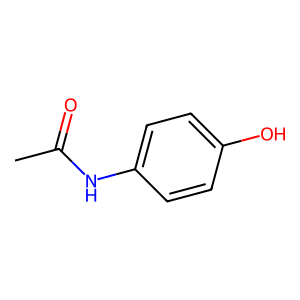

In [3]:
# 1.1 and 1.2
paracetamol = Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
MolToImage(paracetamol)

In [4]:
# 1.3
print(paracetamol.GetNumAtoms())

11


**Answer:**

The molecule shows 11 atoms instead of 20 because RDKit by default only shows "heavy" atoms (non-hydrogen atoms) and there are 9 implicit hydrogen atoms in the SMILES notation.

In [5]:
# 1.4 and # 1.5
print([element for element in paracetamol.GetAtoms()])
print(paracetamol.GetNumBonds())

[<rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee030>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee0a0>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee110>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee180>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee1f0>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee260>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee2d0>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee340>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee3b0>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee420>, <rdkit.Chem.rdchem.Atom object at 0x7f1ea6dee490>]
11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
the following url: https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


1. Download this file and save it in a folder. `(done, I handled it manually)`


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [6]:
from rdkit.Chem import AllChem
from rdkit.Chem import SDMolSupplier

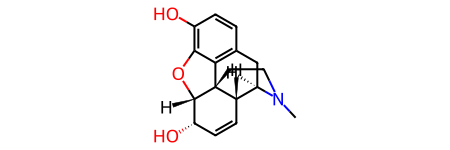

In [7]:
# 2.2
morphin = SDMolSupplier("DB00295.sdf")[0]
morphin

In [8]:
# 2.3
fp = AllChem.GetMorganFingerprintAsBitVect(morphin, 2)
fp

[01:43:15] DEPRECATION WARNING: please use MorganGenerator


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [9]:
import numpy as np
from rdkit import DataStructs

/!\ **I noticed that there is an error in your subject, the given SMILE "CC(=O)OC1=CC=CC=C1C(O)=O" is for aspirin and not paracetamol**

In [10]:
# 3.1
paracetamol_fp = AllChem.GetMorganFingerprintAsBitVect(paracetamol, 2, nBits=1024)

paracetamol_array = np.zeros((1,))
DataStructs.ConvertToNumpyArray(paracetamol_fp, paracetamol_array)
print("Paracetamol nonzero bits:", np.nonzero(paracetamol_array)[0])

Paracetamol nonzero bits: [  33   53  128  191  245  289  356  530  578  650  726  745  754  792
  807  843  849  893 1017]


[01:43:15] DEPRECATION WARNING: please use MorganGenerator


/!\ **I noticed that there is an error in your subject, the given SMILE "CC(=O)NC1=CC=C(O)C=C1" is for paracetamol and not aspirin**

In [11]:
# 3.2
aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(O)=O")
aspirin_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)

paracetamol_array = np.zeros((1,))
DataStructs.ConvertToNumpyArray(aspirin_fp, paracetamol_array)
print("Paracetamol nonzero bits:", np.nonzero(paracetamol_array)[0])

Paracetamol nonzero bits: [  11   23   33   64  175  356  386  389  423  444  456  592  650  695
  705  726  751  807  849  893  909  946  967 1017]


[01:43:16] DEPRECATION WARNING: please use MorganGenerator


In [12]:
# 3.3
similarity = DataStructs.DiceSimilarity(paracetamol_fp, aspirin_fp)
print(f"\nDice similarity between paracetamol and aspirin: {similarity:.3f}")


Dice similarity between paracetamol and aspirin: 0.372


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [13]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

In [14]:
paracetamol_smile = "CC(=O)NC1=CC=C(O)C=C1"

desc_list = [x[0] for x in Descriptors._descList]
desc_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)

paracetamol = Chem.MolFromSmiles(paracetamol_smile)
descriptors = desc_calculator.CalcDescriptors(paracetamol)

In [15]:
for name, value in zip(desc_list, descriptors):
    print(f"{name}: {value}")

MaxAbsEStateIndex: 10.524468537414966
MaxEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
MinEStateIndex: -0.11510204081632636
qed: 0.5950261967780849
SPS: 9.181818181818182
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964755
BCUT2D_CHGHI: 1.9280360590359866
BCUT2D_CHGLO: -1.9945540738765895
BCUT2D_LOGPHI: 2.12524757916018
BCUT2D_LOGPLOW: -2.04401131261029
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266109
AvgIpc: 1.9291266251851134
BalabanJ: 2.7362980721056545
BertzCT: 253.29949758389105
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

In [16]:
# 5.1
smiles_list = [
    "CC(=O)NC1=CC=C(O)C=C1",  # Paracetamol
    "CC(=O)OC1=CC=CC=C1C(O)=O",  # Aspirin
    "CCCN(C)C3=C2OC1=CC=C(O)C=C1C(=O)C2=CC=C3",  # Morphine
]

In [17]:
def find_and_highlight_pattern(smiles_list, pattern):
    matches = []
    highlighted_mols = []

    for smile in smiles_list:
        mol = Chem.MolFromSmiles(smile)
        pattern_mol = Chem.MolFromSmarts(pattern)

        matches_indices = mol.GetSubstructMatches(pattern_mol)

        if matches_indices:
            matches.append(mol)

            # matching atoms to highlight
            atoms = []
            for match in matches_indices:
                atoms.extend(list(match))

            highlight_mol = Draw.MolToImage(mol, highlightAtoms=atoms)
            highlighted_mols.append(highlight_mol)

    return matches, highlighted_mols

In [18]:
def analyze_molecules_with_pattern(smiles_list, pattern):
    matches, highlighted_mols = find_and_highlight_pattern(smiles_list, pattern)

    print(f"== Molecules containing pattern '{pattern}' ==")
    for i, (mol, img) in enumerate(zip(matches, highlighted_mols)):
        print(f"\nMatch {i+1}:")
        print(f"SMILES: {Chem.MolToSmiles(mol)}")
        display(img)

== Molecules containing pattern 'CCC' ==

Match 1:
SMILES: CCCN(C)c1cccc2c(=O)c3cc(O)ccc3oc12


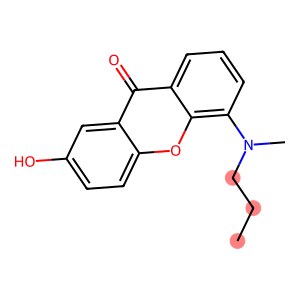

In [19]:
analyze_molecules_with_pattern(smiles_list, "CCC")

== Molecules containing pattern 'C(=O)N' ==

Match 1:
SMILES: CC(=O)Nc1ccc(O)cc1


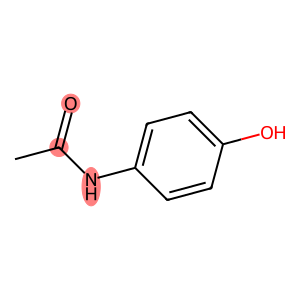

In [20]:
analyze_molecules_with_pattern(smiles_list, "C(=O)N")

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from the following link: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf. `(done, I handled it manually)`


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# 6.1.2
molecules = Chem.SDMolSupplier("solubility.train.sdf", removeHs=False)
molecule_list = [mol for mol in molecules if mol is not None]

In [23]:
# 6.1.3
feature_names = [x[0] for x in Descriptors._descList]

def calculate_descriptors(mol, feature_names=feature_names):
    desc_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(feature_names)
    return desc_calculator.CalcDescriptors(mol)

In [24]:
# 6.1.4
descriptors_list = [calculate_descriptors(mol) for mol in molecule_list]

df = pd.DataFrame(descriptors_list, columns=feature_names)
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,2.211806,1.343750,1.343750,0.468786,8.400000,72.151,60.055,72.093900,32,...,0,0,0,0,0,0,0,0,2,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,24.000000,70.135,60.055,70.078250,30,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,2.231806,1.355000,1.355000,0.462954,9.000000,86.178,72.066,86.109550,38,...,0,0,0,0,0,0,0,0,3,0
3,2.253472,2.253472,0.898148,0.898148,0.483890,10.000000,86.178,72.066,86.109550,38,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,2.243056,0.541667,0.541667,0.424482,12.000000,86.178,72.066,86.109550,38,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,13.185826,13.185826,0.003051,-1.627805,0.648763,43.093750,444.568,408.280,444.251189,176,...,0,0,0,0,0,0,0,0,0,0
1021,12.042248,12.042248,0.066834,-1.044559,0.410290,47.696970,465.631,422.287,465.309038,188,...,0,0,0,0,0,0,0,0,0,0
1022,13.125689,13.125689,0.037157,-2.328350,0.574043,37.357143,385.416,362.232,385.152537,148,...,0,0,0,0,0,0,0,0,0,0
1023,13.235654,13.235654,0.033093,-1.605971,0.619599,42.636364,460.611,420.291,460.282489,184,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# 6.1.5
labels = [float(mol.GetProp('SOL')) for mol in molecule_list]

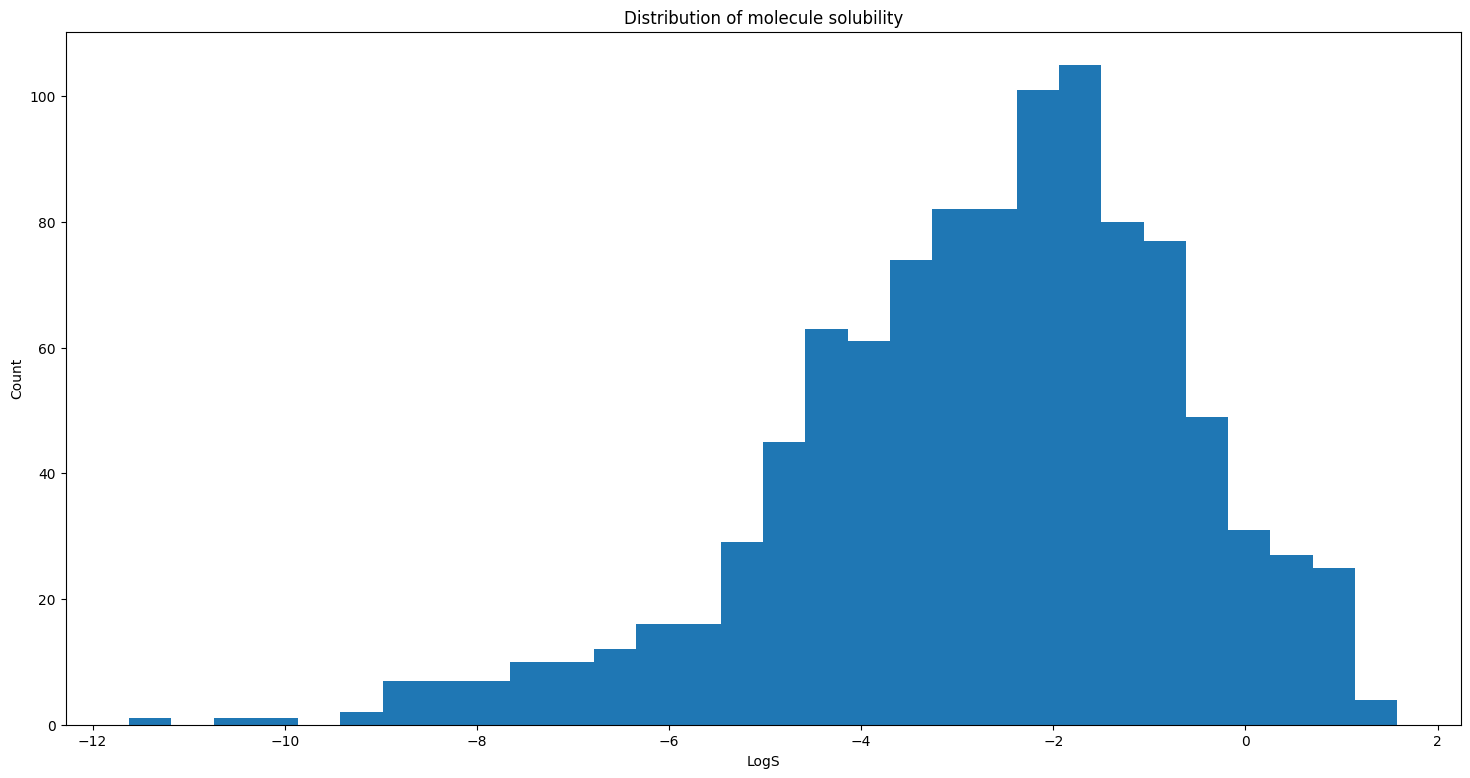

In [26]:
# 6.1.6
plt.figure(figsize=(18, 9))
plt.hist(labels, bins=30)
plt.title('Distribution of molecule solubility')
plt.xlabel('LogS')
plt.ylabel('Count')
plt.show()

**Answer:**
> We can see that the solubility values seem to be normally distributed (most of the values are between -5 and 0 with a peak around -2). \
Very few compounds have very high (> 0) or very low (< -6) solubility

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
# 6.2.1
nan_rows = df.isna().any(axis=1)
print("Number of rows with NaN: ", len(df[nan_rows == True]))

Number of rows with NaN:  1


In [29]:
# cleaning
df_clean = df[~nan_rows]
labels_clean = [label for i, label in enumerate(labels) if not nan_rows[i]]

print("Cleaning from:", len(labels), "to", len(labels_clean), "elements")

Cleaning from: 1025 to 1024 elements


In [30]:
# 6.2.2
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns)
df_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.045160,0.045160,0.354103,0.913346,0.401233,0.084864,0.042084,0.033447,0.042052,0.072581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0
1,0.000000,0.000000,0.395291,0.933978,0.323502,0.330025,0.038831,0.033447,0.038797,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.046428,0.046428,0.357068,0.914831,0.393731,0.094293,0.064721,0.053504,0.064685,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.0
3,0.047803,0.047803,0.236639,0.854507,0.420664,0.110008,0.064721,0.053504,0.064685,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.047142,0.047142,0.142668,0.807435,0.344239,0.141439,0.064721,0.053504,0.064685,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.741391,0.741391,0.000686,0.520969,0.632761,0.630092,0.643087,0.614932,0.643031,0.653226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1020,0.668839,0.668839,0.017499,0.597984,0.325982,0.702434,0.677078,0.638321,0.677036,0.701613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1021,0.737576,0.737576,0.009676,0.428466,0.536638,0.539939,0.547628,0.538038,0.547596,0.540323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1022,0.744553,0.744553,0.008605,0.523852,0.595244,0.622904,0.668977,0.634988,0.668919,0.685484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [31]:
# 6.2.3
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df_scaled, labels_clean)

RandomForestRegressor(random_state=42)

In [32]:
# 6.2.4
y_pred = model.predict(df_scaled)
rmse = np.sqrt(mean_squared_error(labels_clean, y_pred))
print(f"\nTraining RMSE: {rmse:.4f}")


Training RMSE: 0.2246


## Ex6.III Prepare data for test  and test model


1. Download file from : https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf `(done, I handled it manually)`

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [33]:
# 6.3.2 and 6.3.3
test_molecules = Chem.SDMolSupplier("solubility.test.sdf", removeHs=False)

test_molecule_list = [mol for mol in test_molecules if mol is not None]
test_descriptors = [calculate_descriptors(mol) for mol in test_molecule_list]
test_df = pd.DataFrame(test_descriptors, columns=feature_names)
test_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.277778,2.277778,0.935185,0.935185,0.483890,10.000000,86.178,72.066,86.109550,38,...,0,0,0,0,0,0,0,0,0,0
1,2.263889,2.263889,0.875000,0.875000,0.500182,11.142857,100.205,84.077,100.125201,44,...,0,0,0,0,0,0,0,0,0,0
2,3.550417,3.550417,1.152778,1.152778,0.435604,7.400000,70.135,60.055,70.078250,30,...,0,0,0,0,0,0,0,0,1,0
3,2.267361,2.267361,1.319444,1.319444,0.392513,21.333333,82.146,72.066,82.078250,34,...,0,0,0,0,0,0,0,0,0,0
4,3.479167,3.479167,0.916667,0.916667,0.432313,6.400000,68.119,60.055,68.062600,28,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,11.846204,11.846204,0.120059,-0.914495,0.689207,52.000000,312.453,284.229,312.208930,124,...,0,0,0,1,0,0,0,0,0,0
253,12.819624,12.819624,0.060827,-1.757720,0.389668,11.266667,408.362,392.234,408.084517,152,...,0,0,0,0,0,0,0,0,0,0
254,12.578431,12.578431,0.010081,-1.755831,0.113064,47.050000,585.608,542.264,585.285736,234,...,0,0,0,0,0,0,0,0,0,0
255,12.492102,12.492102,0.002089,-3.966975,0.519180,14.363636,494.013,465.789,493.143820,178,...,0,1,0,0,0,0,0,0,0,1


In [34]:
# 6.3.4
test_df_scaled = scaler.transform(test_df)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df.columns)
test_df_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.049345,0.049345,0.246402,0.859397,0.420664,0.110008,0.064721,0.053504,0.064685,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.048464,0.048464,0.230537,0.851450,0.441622,0.127969,0.087358,0.073560,0.087318,0.120968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.130086,0.130086,0.303761,0.888129,0.358547,0.069148,0.038831,0.033447,0.038797,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0
3,0.048684,0.048684,0.347696,0.910137,0.303114,0.288117,0.058214,0.053504,0.058175,0.080645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.125566,0.125566,0.241521,0.856952,0.354313,0.053433,0.035578,0.033447,0.035542,0.056452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.656401,0.656401,0.031530,0.615158,0.684790,0.770058,0.429881,0.407785,0.429802,0.443548,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
253,0.718158,0.718158,0.015916,0.503815,0.299454,0.129915,0.584658,0.588137,0.584627,0.556452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
254,0.702856,0.702856,0.002539,0.504064,-0.056378,0.692266,0.870695,0.838665,0.870781,0.887097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
255,0.697379,0.697379,0.000432,0.212095,0.466061,0.178585,0.722880,0.710963,0.721986,0.661290,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5


Text(0.5, 1.0, 'Predicted / true logS comparision')

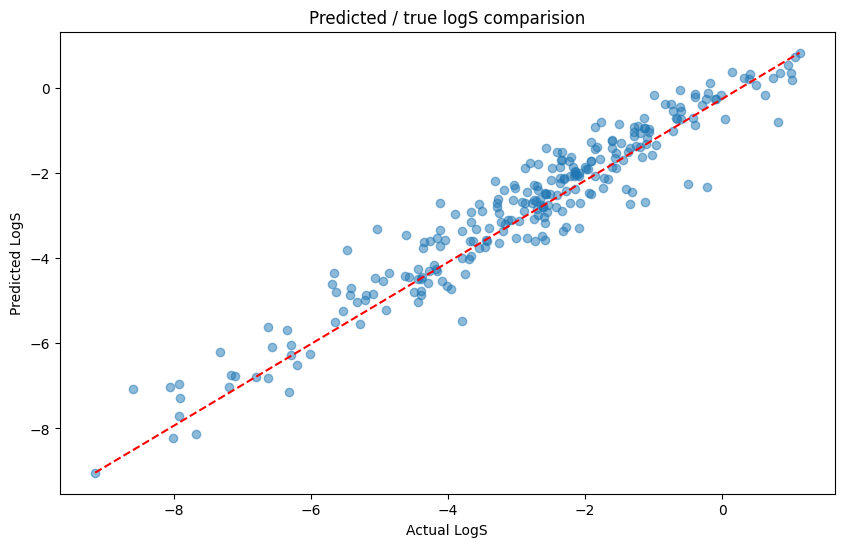

In [35]:
# 6.3.5
test_predictions = model.predict(test_df_scaled)
test_labels = [float(mol.GetProp('SOL')) for mol in test_molecule_list]

plt.figure(figsize=(10, 6))
plt.scatter(test_labels, test_predictions, alpha=0.5)
plt.plot([min(test_labels), max(test_labels)], [min(test_predictions), max(test_predictions)], 'r--')
plt.xlabel('Actual LogS')
plt.ylabel('Predicted LogS')
plt.title("Predicted / true logS comparision")

In [36]:
# Optional
test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
print(f"Test RMSE: {test_rmse:.3f}")

errors = np.abs(test_labels - test_predictions)
large_errors = errors > 1.0

print(f"\nError Analysis:")
print(f"Mean absolute error: {np.mean(errors):.3f}")
print(f"Number of large errors (>{1.0}): {np.sum(large_errors)}")
print(f"Percentage of large errors: {100 * np.sum(large_errors) / len(errors):.1f}%")

Test RMSE: 0.581

Error Analysis:
Mean absolute error: 0.436
Number of large errors (>1.0): 21
Percentage of large errors: 8.2%
